In [1]:
# minimal_cuda_plotly.ipynb

# Imports and device setup
import torch
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Synthesize data
torch.manual_seed(0)
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = 2 * x + 0.2 * torch.rand(x.size())
x, y = x.to(device), y.to(device)

# Model
model = nn.Sequential(
    nn.Linear(1, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
losses = []
for epoch in range(200):
    pred = model(x)
    loss = criterion(pred, y)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f"Final loss: {losses[-1]:.4f}")


Using device: cuda
Final loss: 0.0033


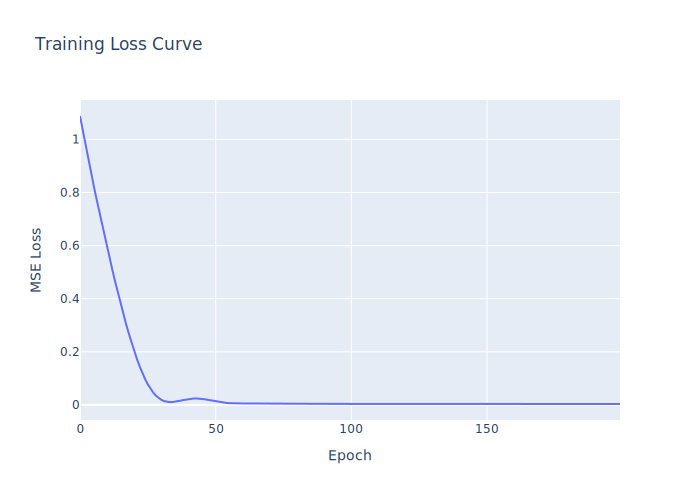

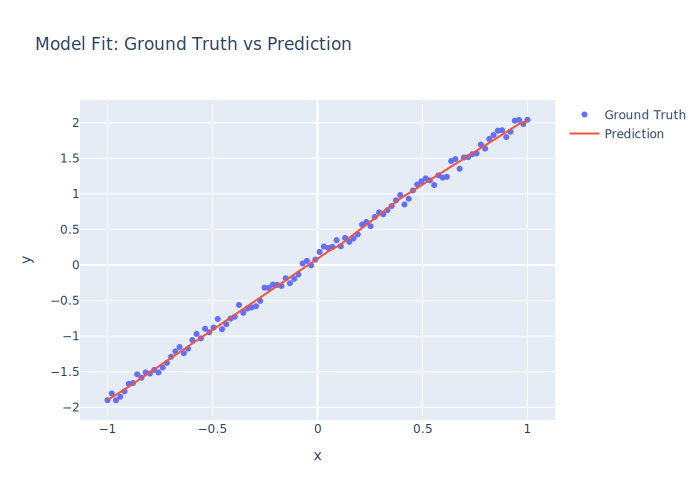

In [3]:
import plotly.graph_objects as go
import plotly.express as px
import kaleido

# Plotly: Loss curve
fig1 = go.Figure()
fig1.add_trace(go.Scatter(y=losses, mode='lines', name='Loss'))
fig1.update_layout(title='Training Loss Curve',
                   xaxis_title='Epoch',
                   yaxis_title='MSE Loss')
fig1.show(
    "svg" # Comment out this line for an interactive plot.
)

# Cell 6: Plotly: Model prediction
x_cpu = x.cpu().squeeze()
y_cpu = y.cpu().squeeze()
pred_cpu = model(x).detach().cpu().squeeze()

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=x_cpu, y=y_cpu, mode='markers', name='Ground Truth'))
fig2.add_trace(go.Scatter(x=x_cpu, y=pred_cpu, mode='lines', name='Prediction'))
fig2.update_layout(title='Model Fit: Ground Truth vs Prediction',
                   xaxis_title='x',
                   yaxis_title='y')
fig2.show(
    "svg" # Comment out this line for an interactive plot.
    )
